# Homework 3: Collaborative Data Wrangling & EDA

### Team Members: Gagandeep Kaur & Anibely Torres Polanco
### Date: September 15, 2025

This section outlines the collaborative process for our team. We've set up a shared GitHub repository and are using Git branches to manage our contributions.

-   **Team Repository**: https://github.com/atp-dotcom/DSEintro/tree/main/HW3
-   **Our Branches**: Each of us has created a separate branch (`Gagan_DA` and `main`) to work on our respective parts of the assignment.
-   **Committing and Pull Requests**: We've made multiple commits with descriptive messages and will be submitting pull requests to merge our work into the main branch.


##  Exploratory Data Analysis (EDA) 🔎

This notebook documents our exploratory analysis of the `co2-gdp-pop-growth.csv` dataset. Our goal is to clean the data and perform a preliminary investigation into the relationship between economic growth and carbon emissions.

### Part 1: Data Cleaning and Preparation

#### Import Libraries & Load Data

We start by importing the necessary libraries. Pandas is essential for data manipulation, NumPy for numerical operations, and Matplotlib and Seaborn for visualizations. We're importing all of them at the beginning so they're ready to use throughout the notebook.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from the 'data' folder

try:
    df = pd.read_csv('../data/co2-gdp-pop-growth.csv')
except FileNotFoundError:
    print("Error: 'data/co2-gdp-pop-growth.csv' not found. Please ensure the file is in the 'data' folder.")


In [3]:
# Check dataset
print("First 5 rows of the raw data:")
df.head()

First 5 rows of the raw data:


,Entity,Code,Year,Population growth (annual %),GDP growth (annual %),Annual CO₂ emissions growth (%)
0,Afghanistan,AFG,1961,1.962239,NaN,18.583180
1,Afghanistan,AFG,1962,2.044523,NaN,40.300896
2,Afghanistan,AFG,1963,2.105208,NaN,2.634644
3,Afghanistan,AFG,1964,2.161195,NaN,18.651236
4,Afghanistan,AFG,1965,2.233709,NaN,20.078205


In [4]:
# We'll get an initial look at the data to understand its structure, data types, and any missing values

print("Initial Dataset Information:")
df.info()

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27645 entries, 0 to 27644
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           27645 non-null  object 
 1   Code                             23674 non-null  object 
 2   Year                             27645 non-null  int64  
 3   Population growth (annual %)     14458 non-null  float64
 4   GDP growth (annual %)            11811 non-null  float64
 5   Annual CO₂ emissions growth (%)  26002 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ MB


In [5]:
df = df.rename(columns={
    "Population growth (annual %)": "population_growth",
    "GDP growth (annual %)": "gdp_growth",
    "Annual CO₂ emissions growth (%)": "co2_growth"
})

In [6]:
# drop missing rows
# We'll drop rows where we have missing values.
# This is a simple and effective way to ensure our analysis is based on complete data points.
df = df.dropna()

In [7]:
df

,Entity,Code,Year,population_growth,gdp_growth,co2_growth
40,Afghanistan,AFG,2001,0.762005,-9.431974,2.098131
41,Afghanistan,AFG,2002,5.252029,28.600000,25.432373
42,Afghanistan,AFG,2003,6.145194,8.832278,16.301846
43,Afghanistan,AFG,2004,3.575835,1.414118,-20.669056
44,Afghanistan,AFG,2005,3.519217,11.229714,52.718650
...,...,...,...,...,...,...
27583,Zimbabwe,ZWE,2019,1.563533,-6.332447,-8.410621
27584,Zimbabwe,ZWE,2020,1.659353,-7.816951,-17.231369
27585,Zimbabwe,ZWE,2021,1.726011,8.468017,20.120394
27586,Zimbabwe,ZWE,2022,1.706209,6.139263,2.168930


In [8]:
# reset the index so it starts at 0 again
df = df.reset_index(drop=True)

In [9]:
df

,Entity,Code,Year,population_growth,gdp_growth,co2_growth
0,Afghanistan,AFG,2001,0.762005,-9.431974,2.098131
1,Afghanistan,AFG,2002,5.252029,28.600000,25.432373
2,Afghanistan,AFG,2003,6.145194,8.832278,16.301846
3,Afghanistan,AFG,2004,3.575835,1.414118,-20.669056
4,Afghanistan,AFG,2005,3.519217,11.229714,52.718650
...,...,...,...,...,...,...
10589,Zimbabwe,ZWE,2019,1.563533,-6.332447,-8.410621
10590,Zimbabwe,ZWE,2020,1.659353,-7.816951,-17.231369
10591,Zimbabwe,ZWE,2021,1.726011,8.468017,20.120394
10592,Zimbabwe,ZWE,2022,1.706209,6.139263,2.168930


In [10]:
# save cleaned dataset
df.to_csv("../data/cleaned_co2_gdp.csv", index=False)

### Part 2: Exploratory Analysis

Now that the data is clean, we can calculate some interesting statistics and create a compelling visualization to uncover patterns.

In [11]:
print("Statistic 1: Mean vs. Median Growth")

# The mean is the average, the median is the middle value.

# A large difference can indicate that the data is skewed by outliers.

print(f"Mean GDP growth (annual %): {df['gdp_growth'].mean():.2f}")
print(f"Median GDP growth (annual %): {df['gdp_growth'].median():.2f}")
print(f"Mean CO₂ emissions growth (annual %): {df['co2_growth'].mean():.2f}")
print(f"Median CO₂ emissions growth (annual %): {df['co2_growth'].median():.2f}")

Statistic 1: Mean vs. Median Growth
Mean GDP growth (annual %): 9485.24
Median GDP growth (annual %): 3.80
Mean CO₂ emissions growth (annual %): 5.10
Median CO₂ emissions growth (annual %): 2.64


In [12]:
print("Statistic 2: Top 5 Countries by Average Annual CO₂ Emissions Growth")

# We'll group the data by 'Entity' and find the average for each one.

top_co2_emitters = df.groupby('Entity')['co2_growth'].mean().sort_values(ascending=False).head(5)
print(top_co2_emitters)

Statistic 2: Top 5 Countries by Average Annual CO₂ Emissions Growth
Entity
Equatorial Guinea    42.501576
Oman                 31.519426
Cambodia             28.507965
Kuwait               24.962862
Mauritania           18.265647
Name: co2_growth, dtype: float64


In [13]:
print("Statistic 2: Bottom 5 Countries by Average Annual CO₂ Emissions Growth")

bottom_co2_emitters = df.groupby('Entity')['co2_growth'].mean().sort_values(ascending=True).head(5)
print(bottom_co2_emitters)

Statistic 2: Bottom 5 Countries by Average Annual CO₂ Emissions Growth
Entity
Moldova   -4.403207
Ukraine   -4.201173
Latvia    -3.020971
Estonia   -2.901347
Romania   -2.588042
Name: co2_growth, dtype: float64


### Interpretation:

 Maldova, Ukraine, Latvia, Estonia and Romania are the 5 contries with the smallest average annual CO₂ emissions growth. Compared to Equatorial Guinea, Oman, Cambodia, Kuwait, and Mauritania, the top 5 countries with the largest average annual CO₂ emissions growth. If we take a closer look, we can observe contries in Eastern Europe / Northeastern Europe are the countries with smallest average annual CO₂ emissions growth, compared to the top 5 countries Equatorial Guinea, Oman, Cambodia, Kuwait, and Mauritania, which are located in Africa, the Middle East, and Southeast Asia regions. This can be due to regulations, as we know certain contries have stronger regulations about CO₂ emissions, which could explain why the countries with smallest average annual CO₂ emissions growth are all within a certain geographical area.

Visualization 1: Top 5 Countries with Highest Average CO₂ Emissions Growth


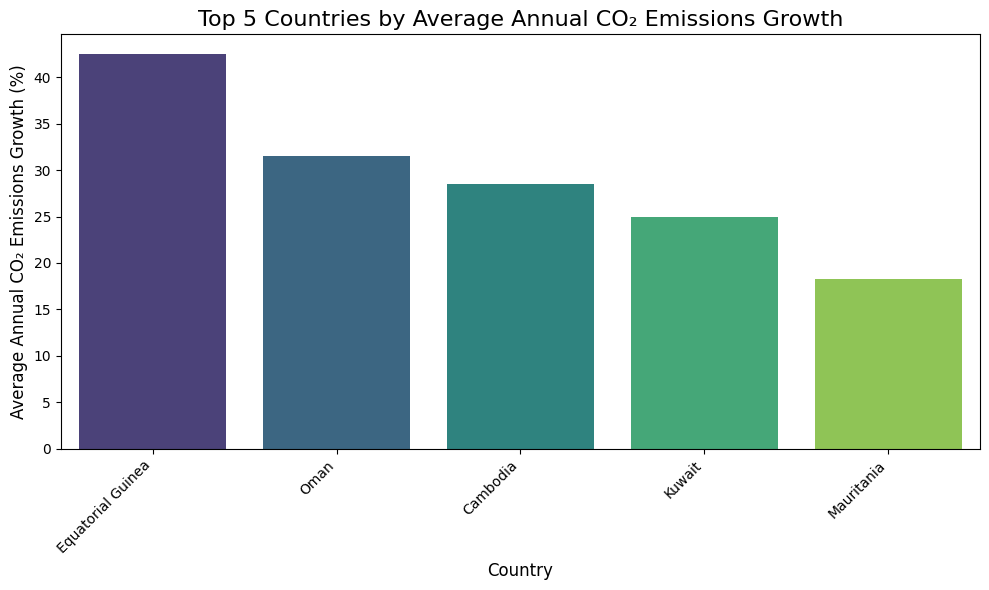

In [14]:
print("Visualization 1: Top 5 Countries with Highest Average CO₂ Emissions Growth")

# Use a bar chart to clearly compare the top countries.
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_co2_emitters.index,
    y=top_co2_emitters.values,
    # This is the corrected syntax to address the FutureWarning
    hue=top_co2_emitters.index,
    legend=False,
    palette='viridis'  # A nice color palette
)
plt.title('Top 5 Countries by Average Annual CO₂ Emissions Growth', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Annual CO₂ Emissions Growth (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjusts plot to ensure labels aren't cut off
plt.show()

### Interpretation:

This chart highlights the countries with the highest average annual growth in CO₂ emissions. If emerging economies dominate the top ranks, it suggests development is closely tied to higher carbon output (That means Equatorial Guinea had more development linked to CO2). In contrast, developed economies may show lower averages due to slower growth rates and 
cleaner energy adoption.

In [15]:
print("Statistic 3: Correlation Change Over Time")

# Let's split the data into two periods to see if the relationship has changed.

pre_2000 = df[df['Year'] < 2000]
post_2000 = df[df['Year'] >= 2000]

corr_pre_2000 = pre_2000['gdp_growth'].corr(pre_2000['co2_growth'])
corr_post_2000 = post_2000['gdp_growth'].corr(post_2000['co2_growth'])

print(f"Correlation (pre-2000): {corr_pre_2000:.2f}")
print(f"Correlation (post-2000): {corr_post_2000:.2f}")

Statistic 3: Correlation Change Over Time
Correlation (pre-2000): 0.04
Correlation (post-2000): 0.27


### Interpretation:

##### Before 2000 (Correlation = 0.04):
There was almost no relationship between GDP growth and CO₂ emissions growth. Economic growth did not strongly affect emissions growth in that period.

##### After 2000 (Correlation = 0.27):
The relationship became stronger and more positive. This means that after 2000, when economies grew faster, CO₂ emissions also tended to grow more consistently alongside.

Visualization 2: Correlation between Global GDP and CO₂ Emissions


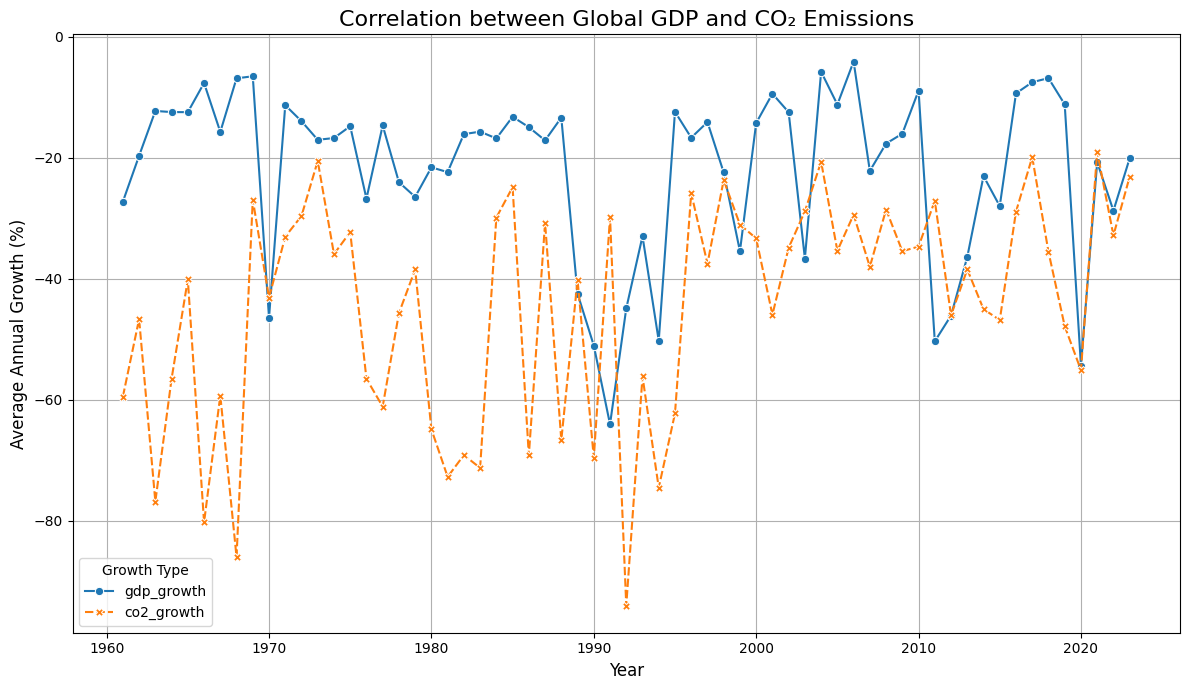

In [19]:
print("Visualization 2: Correlation between Global GDP and CO₂ Emissions")

# First, let's calculate the global average for each year
global_trends = df.groupby('Year')[['gdp_growth', 'co2_growth']].min()

# Create a time-series plot to show the trends over decades.
plt.figure(figsize=(12, 7))
sns.lineplot(data=global_trends, markers=True)

plt.title('Correlation between Global GDP and CO₂ Emissions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Annual Growth (%)', fontsize=12)
plt.legend(title='Growth Type')
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation:
When the world economy grows, CO₂ emissions also grow. During slowdowns or crises, emissions drop even more sharply than GDP.

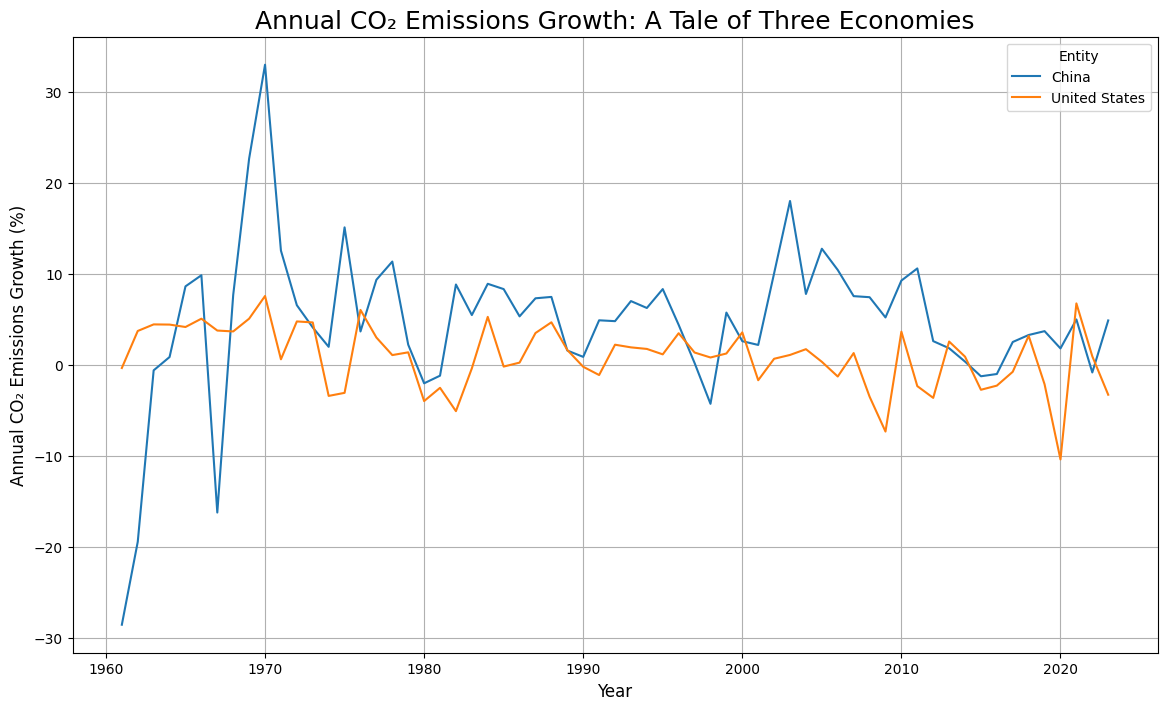

In [17]:
# First, let's filter for a few key entities to compare
entities_to_plot = ['United States', 'China']
filtered_df = df[df['Entity'].isin(entities_to_plot)]

# Now, we'll plot a time-series line plot for each entity.
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_df,
    x='Year',
    y='co2_growth',
    hue='Entity',  # The hue parameter assigns a different color to each entity
    markers=True,
    dashes=False
)

plt.title('Annual CO₂ Emissions Growth: A Tale of Three Economies', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual CO₂ Emissions Growth (%)', fontsize=12)
plt.legend(title='Entity')
plt.grid(True)
plt.show()

# Notice how China's CO2 emissions growth is much more volatile than the United States'.

### Interpretation:
China’s CO2 growth curve is more volatile and generally higher than that of the U.S., reflecting its rapid industrial expansion and changing energy policies. The U.S. shows steadier, lower growth, with some declines, likely due to energy efficiency, regulations, and a transition toward renewable energy. The contrast illustrates the different stages of economic development: China as a fast-growing emitter and the U.S. as a more stabilized economy with slower growth in emissions.